<a href="https://colab.research.google.com/github/Ellie1220/Hackathon-1-SBA/blob/main/Hackathon_1_SBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U.S. Small Business Administration (SBA)
Here's how the dataset can be utilized to predict creditworthiness:

Historical Loan Data: The dataset contains information about past loans, including details about the borrowers, loan terms, and outcomes. Analyzing this historical data can help identify patterns and factors that contribute to successful loan repayment or default.

Features Relevant to Creditworthiness: The dataset includes various features such as borrower demographics (e.g., location, industry), loan characteristics (e.g., term, amount), and employment-related information (e.g., number of employees, job creation). These features can be used to build predictive models that assess the creditworthiness of potential borrowers.

Target Variable (MIS_Status): The target variable in the dataset, "MIS_Status," indicates whether a loan was charged off (defaulted) or paid in full. By analyzing the relationships between the target variable and other features, predictive models can be developed to predict the likelihood of loan default or successful repayment.

Model Development: Machine learning algorithms such as logistic regression, decision trees, random forests, or gradient boosting can be trained on the dataset to predict creditworthiness. These models can learn from past loan data to make predictions about the likelihood of future loan outcomes based on the characteristics of borrowers and loans.

Model Evaluation: The performance of the predictive models can be evaluated using metrics such as accuracy, precision, recall, and F1-score. The models can be tested on a holdout dataset to assess their ability to generalize to unseen data and make accurate predictions about creditworthiness.

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from keras.models import Sequential
from keras.layers import Dense

In [261]:
SBA=pd.read_csv('/content/SBAnational.csv')

<ipython-input-261-1cf673ca42c1>:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [262]:
SBA.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,...,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [263]:
SBA.tail(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899153,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
899154,9995453003,"FUTURE LEADERS CENTER, INC.",SO. OZONE PARK,NY,11420,FLUSHING BANK,NY,624410,27-Feb-97,1997,...,0,N,NaN,30-Jun-97,"$123,000.00",$0.00,P I F,$0.00,"$128,000.00","$96,000.00"
899155,9995473009,"FABRICATORS STEEL, INC.",BALTIMORE,MD,21224,BANK OF AMERICA NATL ASSOC,MD,332431,27-Feb-97,1997,...,0,N,NaN,30-Jun-97,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
899156,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,27-Feb-97,1997,...,N,N,NaN,31-Mar-97,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$150,000.00"
899157,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$79,000.00",$0.00,P I F,$0.00,"$79,000.00","$63,200.00"
899158,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899159,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899160,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899161,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899162,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


In [264]:
SBA.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991630e+05,899163.000000,899163.000000,899163.000000,899163.000000,899027.000000,899163.000000,899163.000000,899163.000000,899163.000000
mean,4.772612e+09,53804.448338,398660.491220,110.773181,11.411366,1.280403,8.430385,10.797268,2753.728996,0.757747
std,2.538176e+09,31184.129492,263318.099589,78.857288,74.108237,0.451750,236.688297,237.120731,12758.025900,0.646435
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589750e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361434e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904629e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [265]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899163 entries, 0 to 899162
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899163 non-null  int64  
 1   Name               899149 non-null  object 
 2   City               899133 non-null  object 
 3   State              899149 non-null  object 
 4   Zip                899163 non-null  int64  
 5   Bank               897604 non-null  object 
 6   BankState          897597 non-null  object 
 7   NAICS              899163 non-null  int64  
 8   ApprovalDate       899163 non-null  object 
 9   ApprovalFY         899163 non-null  object 
 10  Term               899163 non-null  int64  
 11  NoEmp              899163 non-null  int64  
 12  NewExist           899027 non-null  float64
 13  CreateJob          899163 non-null  int64  
 14  RetainedJob        899163 non-null  int64  
 15  FranchiseCode      899163 non-null  int64  
 16  Ur

In [266]:
SBA.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736464
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1996
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**Filtering State:MA**

In [267]:
# Filter rows where the 'State' column equals 'MA'
MA = SBA[SBA['State'] == 'MA']

In [268]:
MA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
27,1000504008,HUNTERSBROOK STABLE,MARSHFIELD,MA,2050,ROCKLAND TRUST COMPANY,MA,0,28-Feb-97,1997,...,N,Y,NaN,31-Jul-97,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00"
37,1000574007,VILLAGE REST HOME,NORTH EASTON,MA,2356,HOME LOAN INVEST BANK F.S.B.,RI,0,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
45,1000665006,"Dover Quality Foods, Inc.",Dover (census name for Dover C,MA,2030,BANK OF AMERICA NATL ASSOC,MA,0,25-Mar-97,1997,...,0,N,NaN,30-Sep-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
51,1000695004,Karl Duclos,Fall River,MA,2720,BANK OF AMERICA NATL ASSOC,MA,235510,25-Mar-97,1997,...,0,N,NaN,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
53,1000705005,"Alan S. Budd D.M.D., P.C.",Boston,MA,2116,BANK OF AMERICA NATL ASSOC,RI,621210,26-Mar-97,1997,...,0,N,NaN,30-Sep-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"


In [269]:
MA.isnull().sum()

LoanNr_ChkDgt            0
Name                     1
City                     5
State                    0
Zip                      0
Bank                    70
BankState               70
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 5
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr              137
LowDoc                  64
ChgOffDate           21898
DisbursementDate        91
DisbursementGross        0
BalanceGross             0
MIS_Status             179
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

In [270]:
MA.nunique()

LoanNr_ChkDgt        25271
Name                 22086
City                  1326
State                    1
Zip                    840
Bank                   290
BankState               36
NAICS                  967
ApprovalDate          5491
ApprovalFY              49
Term                   275
NoEmp                  185
NewExist                 3
CreateJob               70
RetainedJob            128
FranchiseCode          278
UrbanRural               3
RevLineCr                5
LowDoc                   6
ChgOffDate            1658
DisbursementDate      1039
DisbursementGross     7270
BalanceGross             1
MIS_Status               2
ChgOffPrinGr          3057
GrAppv                1797
SBA_Appv              2642
dtype: int64

<Axes: >

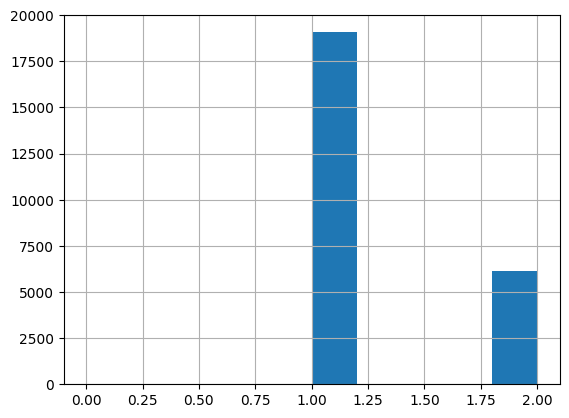

In [271]:
MA.NewExist.hist()

<Axes: >

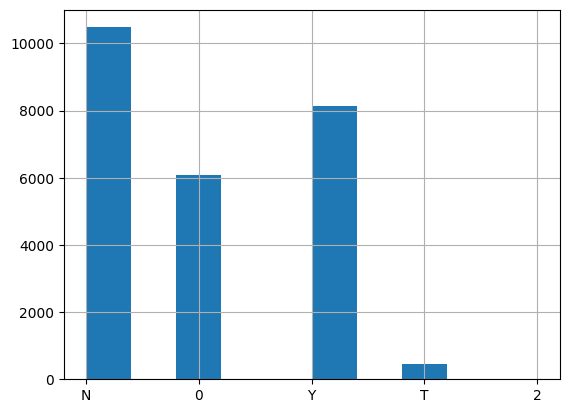

In [272]:
MA.RevLineCr.hist()

<Axes: >

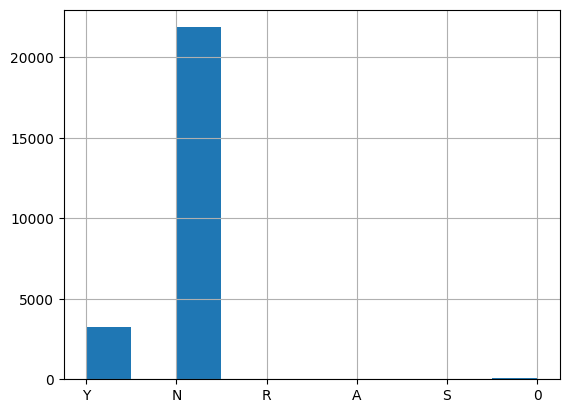

In [273]:
MA.LowDoc.hist()

<Axes: >

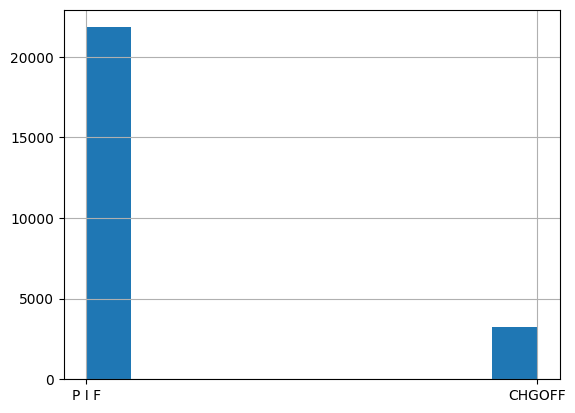

In [274]:
MA.MIS_Status.hist()

In [275]:
MA.MIS_Status.value_counts()

P I F     21835
CHGOFF     3257
Name: MIS_Status, dtype: int64

In [276]:
# Create a new column 'MIS_Status_Binary' with binary values
MA['MIS_Status_Binary'] = 0  # Initialize with default value (0 for 'PIF')

# Set the value to 1 where 'MIS_Status' is 'CHGOFF'
MA.loc[MA['MIS_Status'] == 'CHGOFF', 'MIS_Status_Binary'] = 1

<ipython-input-276-41fa57022ef6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [277]:
# View the updated DataFrame
print(MA.head())


    LoanNr_ChkDgt                       Name                            City  \
27     1000504008        HUNTERSBROOK STABLE                      MARSHFIELD   
37     1000574007          VILLAGE REST HOME                    NORTH EASTON   
45     1000665006  Dover Quality Foods, Inc.  Dover (census name for Dover C   
51     1000695004                Karl Duclos                      Fall River   
53     1000705005  Alan S. Budd D.M.D., P.C.                          Boston   

   State   Zip                          Bank BankState   NAICS ApprovalDate  \
27    MA  2050        ROCKLAND TRUST COMPANY        MA       0    28-Feb-97   
37    MA  2356  HOME LOAN INVEST BANK F.S.B.        RI       0    28-Feb-97   
45    MA  2030    BANK OF AMERICA NATL ASSOC        MA       0    25-Mar-97   
51    MA  2720    BANK OF AMERICA NATL ASSOC        MA  235510    25-Mar-97   
53    MA  2116    BANK OF AMERICA NATL ASSOC        RI  621210    26-Mar-97   

   ApprovalFY  ...  LowDoc  ChgOffDate  Disb

<Axes: >

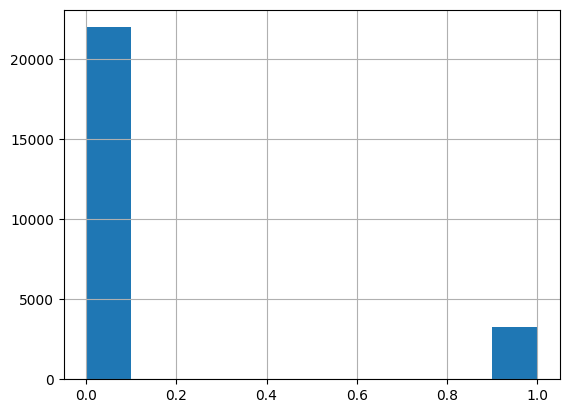

In [278]:
MA.MIS_Status_Binary.hist()

In [279]:
# Convert 'Zip' column from integer to string
MA['Zip'] = MA['Zip'].astype(str)
MA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25271 entries, 27 to 898932
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      25271 non-null  int64  
 1   Name               25270 non-null  object 
 2   City               25266 non-null  object 
 3   State              25271 non-null  object 
 4   Zip                25271 non-null  object 
 5   Bank               25201 non-null  object 
 6   BankState          25201 non-null  object 
 7   NAICS              25271 non-null  int64  
 8   ApprovalDate       25271 non-null  object 
 9   ApprovalFY         25271 non-null  object 
 10  Term               25271 non-null  int64  
 11  NoEmp              25271 non-null  int64  
 12  NewExist           25266 non-null  float64
 13  CreateJob          25271 non-null  int64  
 14  RetainedJob        25271 non-null  int64  
 15  FranchiseCode      25271 non-null  int64  
 16  UrbanRural         2

<ipython-input-279-9c60dd813fd4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
MA.duplicated().sum()

0

In [281]:
MA.corr()

<ipython-input-281-911b531737d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status_Binary
LoanNr_ChkDgt,1.000000,-0.056602,0.059115,0.018473,-0.108081,-0.022848,-0.024128,0.050462,-0.156394,-0.143843
NAICS,-0.056602,1.000000,-0.123181,-0.055396,0.004531,-0.045897,-0.041147,0.035819,0.464489,0.060590
Term,0.059115,-0.123181,1.000000,0.080910,-0.034822,0.056507,0.052958,0.023464,-0.213700,-0.280646
NoEmp,0.018473,-0.055396,0.080910,1.000000,-0.040091,0.015272,0.022481,-0.001057,-0.072106,-0.028639
NewExist,-0.108081,0.004531,-0.034822,-0.040091,1.000000,-0.011961,-0.017889,0.104460,0.023381,0.014891
CreateJob,-0.022848,-0.045897,0.056507,0.015272,-0.011961,1.000000,0.998583,-0.004176,-0.038508,-0.002343
RetainedJob,-0.024128,-0.041147,0.052958,0.022481,-0.017889,0.998583,1.000000,-0.004940,-0.031845,-0.001753
FranchiseCode,0.050462,0.035819,0.023464,-0.001057,0.104460,-0.004176,-0.004940,1.000000,-0.008675,-0.012830
UrbanRural,-0.156394,0.464489,-0.213700,-0.072106,0.023381,-0.038508,-0.031845,-0.008675,1.000000,0.132046
MIS_Status_Binary,-0.143843,0.060590,-0.280646,-0.028639,0.014891,-0.002343,-0.001753,-0.012830,0.132046,1.000000


<ipython-input-282-8e3e6bc6d47b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



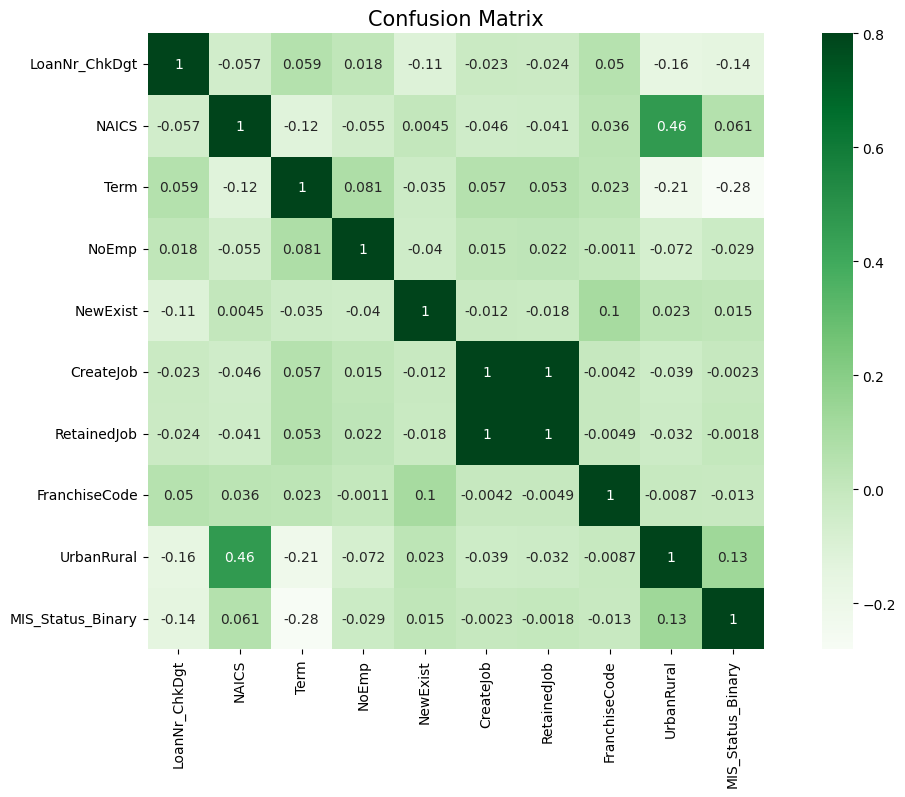

In [282]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(MA.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);

In [284]:
# Assuming 'MA' is your DataFrame containing the 'Zip' column
top_five_zip = MA['Zip'].value_counts().head(10)

print("Top Ten Most Frequent ZIP Codes:")
print(top_five_zip)



Top Ten Most Frequent ZIP Codes:
1801    290
2169    257
1201    236
2360    233
2116    231
1923    229
1960    208
1970    203
1701    191
1915    179
Name: Zip, dtype: int64


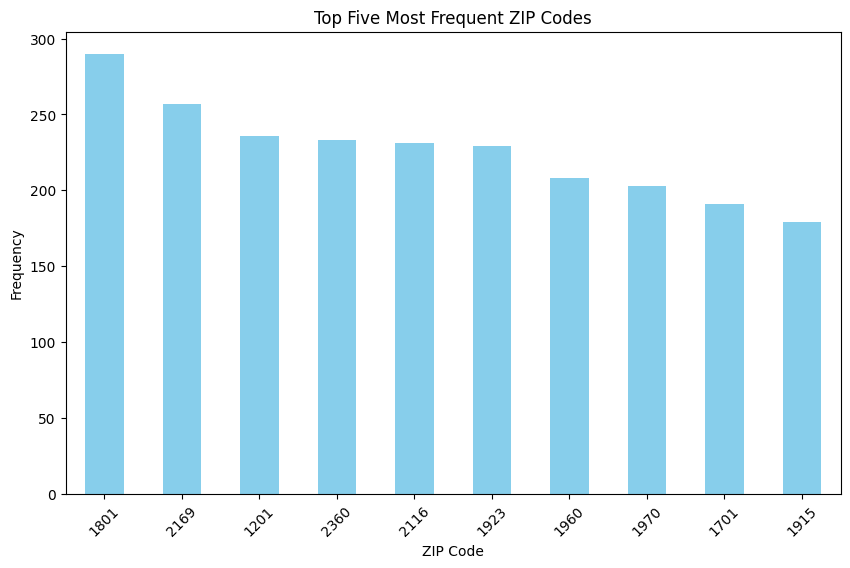

In [285]:
import matplotlib.pyplot as plt

# Assuming 'MA' is your DataFrame containing the 'Zip' column
top_ten_zip = MA['Zip'].value_counts().head(10)

# Plot the top five most frequent ZIP codes
plt.figure(figsize=(10, 6))
top_five_zip.plot(kind='bar', color='skyblue')
plt.title('Top Five Most Frequent ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


1201: Pittsfield (Berkshire County)

1923: Essex (Essex County)

1970: Salem (Essex County)

1801: Woburn (Middlesex County)

1960: Lawrence (Essex County)

2360: Plymouth (Plymouth County)

2169: Plainville (Norfolk County)

1060: Springfield (Hampden County)

1915: Burlington (Middlesex County)

1453: Leominster (Worcester County)

In [286]:
MA

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary
27,1000504008,HUNTERSBROOK STABLE,MARSHFIELD,MA,2050,ROCKLAND TRUST COMPANY,MA,0,28-Feb-97,1997,...,Y,NaN,31-Jul-97,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00",0
37,1000574007,VILLAGE REST HOME,NORTH EASTON,MA,2356,HOME LOAN INVEST BANK F.S.B.,RI,0,28-Feb-97,1997,...,Y,NaN,31-May-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",0
45,1000665006,"Dover Quality Foods, Inc.",Dover (census name for Dover C,MA,2030,BANK OF AMERICA NATL ASSOC,MA,0,25-Mar-97,1997,...,N,NaN,30-Sep-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",0
51,1000695004,Karl Duclos,Fall River,MA,2720,BANK OF AMERICA NATL ASSOC,MA,235510,25-Mar-97,1997,...,N,NaN,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",0
53,1000705005,"Alan S. Budd D.M.D., P.C.",Boston,MA,2116,BANK OF AMERICA NATL ASSOC,RI,621210,26-Mar-97,1997,...,N,NaN,30-Sep-97,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898836,9989143008,BELCASTRO REFININSHING,WESTBORO,MA,1886,ENTERPRISE BK & TR CO,MA,0,26-Feb-97,1997,...,Y,NaN,30-Jun-97,"$98,000.00",$0.00,P I F,$0.00,"$98,000.00","$78,400.00",0
898853,9989423009,SPRINGBOARD TECH. CORPORATION,SPRINGFIELD,MA,1101,UPS CAPITAL BUSINESS CREDIT,CT,0,26-Feb-97,1997,...,N,27-Sep-10,31-May-97,"$1,000,000.00",$0.00,CHGOFF,"$118,346.00","$1,000,000.00","$750,000.00",1
898890,9989973010,NAPOLEON PIZZA,BELLINGHAM,MA,2019,ROCKLAND TRUST COMPANY,MA,0,26-Feb-97,1997,...,Y,NaN,31-Mar-97,"$29,000.00",$0.00,P I F,$0.00,"$29,000.00","$23,200.00",0
898898,9990083000,DESIGN & ADVERTISING ASSOC,SPRINGFIELD,MA,1105,"TD BANK, NATIONAL ASSOCIATION",MA,541810,26-Feb-97,1997,...,Y,NaN,31-May-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00",0


## Data Cleaning

City: Since there are only 4 missing values, you might consider dropping the rows with missing 'City' values.

In [287]:
# Drop rows with missing 'City' values
MA.dropna(subset=['City'], inplace=True)


<ipython-input-287-60d522895aa5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NewExist: With only 4 missing values, you might impute these missing values with the mode (most frequent value) of the 'NewExist' column.

In [288]:
# Impute missing 'NewExist' values with the mode
mode_NewExist = MA['NewExist'].mode()[0]
MA['NewExist'].fillna(mode_NewExist, inplace=True)


<ipython-input-288-c73f3b20269f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RevLineCr: Since there are 119 missing values, you might consider creating a new category or imputing with the mode, depending on the nature of the data

In [289]:
# Impute missing 'RevLineCr' values with the mode
mode_RevLineCr = MA['RevLineCr'].mode()[0]
MA['RevLineCr'].fillna(mode_RevLineCr, inplace=True)


<ipython-input-289-867c9b8f8885>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LowDoc: Similar to 'RevLineCr', you can impute missing values with the mode.

In [290]:
# Impute missing 'LowDoc' values with the mode
mode_LowDoc = MA['LowDoc'].mode()[0]
MA['LowDoc'].fillna(mode_LowDoc, inplace=True)


<ipython-input-290-133602a0d535>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ChgOffDate, DisbursementDate, MIS_Status: These variables have a relatively large number of missing values. For 'ChgOffDate' and 'DisbursementDate', you might not be able to impute accurately without additional context. For 'MIS_Status', you might drop rows with missing values or create a new category to represent missing values.

In [291]:
# Drop rows with missing 'MIS_Status'
MA.dropna(subset=['MIS_Status'], inplace=True)


<ipython-input-291-fda7760e7892>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [292]:
# Drop 'ChgOffDate' and 'DisbursementDate' columns
MA.drop(columns=['ChgOffDate', 'DisbursementDate'], inplace=True)


<ipython-input-292-0297ef44dad9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [293]:
MA.isnull().sum()

LoanNr_ChkDgt         0
Name                  1
City                  0
State                 0
Zip                   0
Bank                 68
BankState            68
NAICS                 0
ApprovalDate          0
ApprovalFY            0
Term                  0
NoEmp                 0
NewExist              0
CreateJob             0
RetainedJob           0
FranchiseCode         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
BalanceGross          0
MIS_Status            0
ChgOffPrinGr          0
GrAppv                0
SBA_Appv              0
MIS_Status_Binary     0
dtype: int64

In [294]:
#To handle the outliers in the 'RevLineCr' and 'LowDoc' variables
# Check unique values in 'RevLineCr'
print("Unique values in 'RevLineCr':", MA['RevLineCr'].unique())

# Check unique values in 'LowDoc'
print("Unique values in 'LowDoc':", MA['LowDoc'].unique())
# Replace outliers in 'RevLineCr'
MA['RevLineCr'] = MA['RevLineCr'].replace({'0': 'N', 'T': 'Y'})

# Replace outliers in 'LowDoc'
MA['LowDoc'] = MA['LowDoc'].replace({'0': 'N'})

# Check unique values again to confirm changes
print("Unique values in 'RevLineCr' after correction:", MA['RevLineCr'].unique())
print("Unique values in 'LowDoc' after correction:", MA['LowDoc'].unique())


Unique values in 'RevLineCr': ['N' '0' 'Y' 'T' '2']
Unique values in 'LowDoc': ['Y' 'N' 'R' 'A' 'S' '0']
Unique values in 'RevLineCr' after correction: ['N' 'Y' '2']
Unique values in 'LowDoc' after correction: ['Y' 'N' 'R' 'A' 'S']


<ipython-input-294-9c691f6e06c6>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-294-9c691f6e06c6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

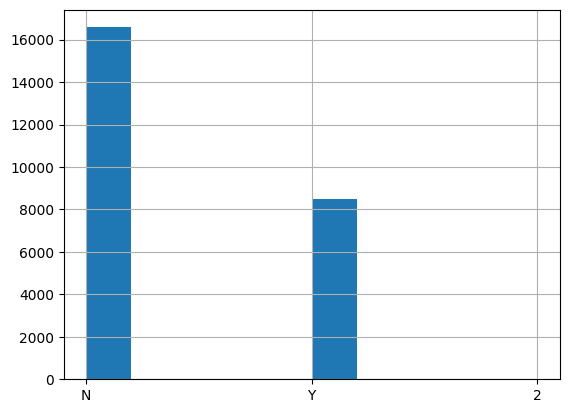

In [295]:
MA.RevLineCr.hist()

<Axes: >

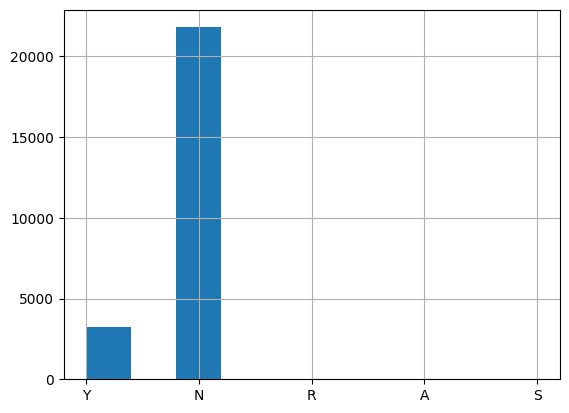

In [296]:
MA.LowDoc.hist()

In [297]:
# Remove rows with '2' in 'RevLineCr'
MA = MA[MA['RevLineCr'] != '2']
# Remove rows with unexpected values in 'LowDoc'
unexpected_values = ['R', 'A', 'C', 'S']
MA = MA[~MA['LowDoc'].isin(unexpected_values)]

<Axes: >

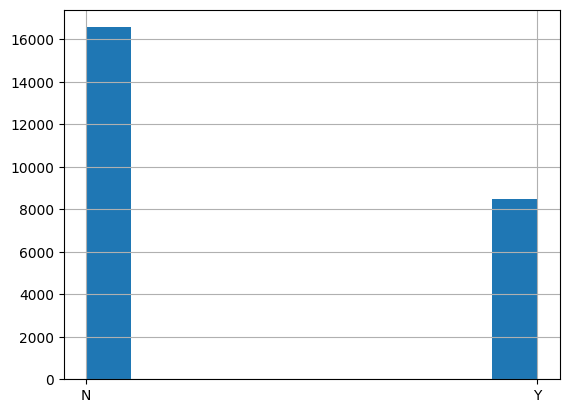

In [298]:
MA.RevLineCr.hist()

<Axes: >

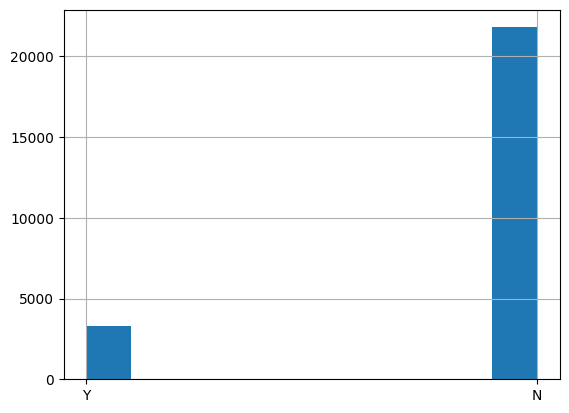

In [299]:
MA.LowDoc.hist()

<Axes: >

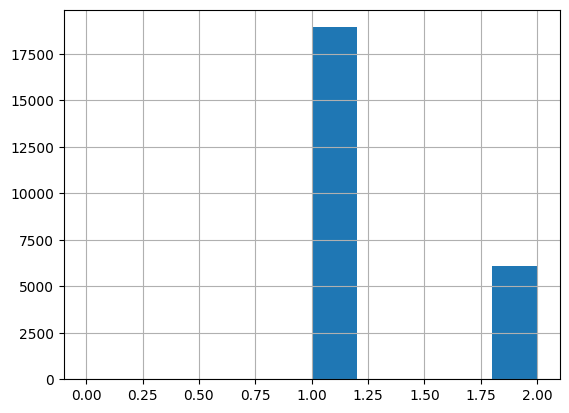

In [300]:
MA.NewExist.hist()

In [301]:
# Convert 'NewExist' to string type
MA['NewExist'] = MA['NewExist'].astype(str)
MA['NewExist'] = MA['NewExist'].map({'1.0': '0', '2.0': '1'})
print(MA['NewExist'].dtype)

object


<Axes: >

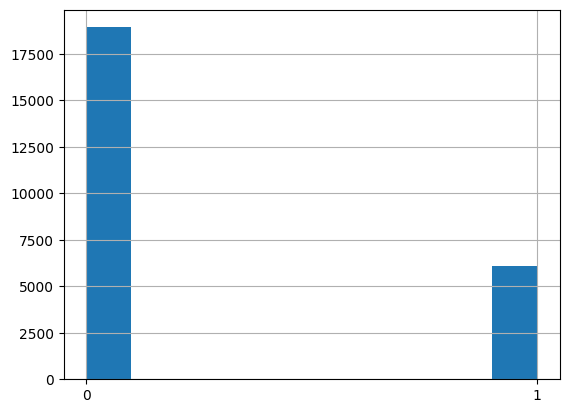

In [302]:
MA.NewExist.hist()

<Axes: >

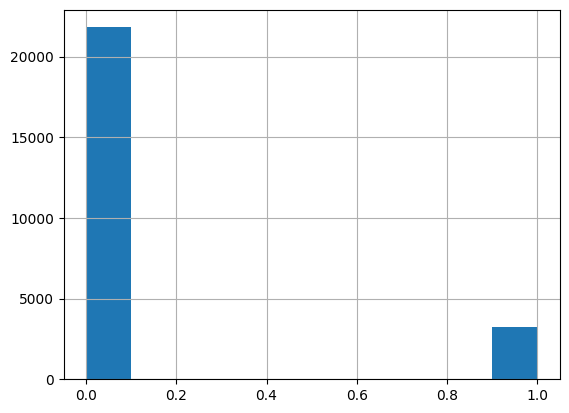

In [303]:
MA.MIS_Status_Binary.hist()

In [304]:
# Convert 'NewExist' to string type
MA['MIS_Status_Binary'] = MA['MIS_Status_Binary'].astype(str)
print(MA['MIS_Status_Binary'].dtype)

object


<Axes: >

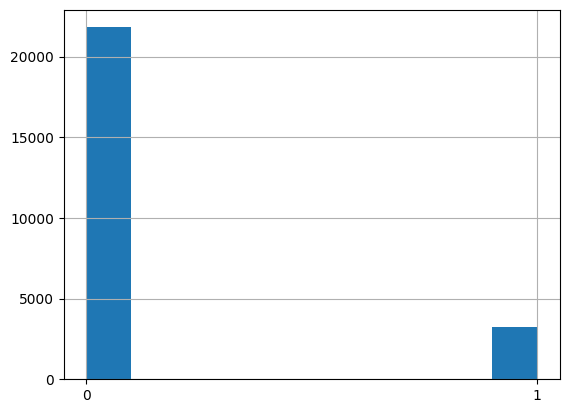

In [305]:
MA.MIS_Status_Binary.hist()

In [306]:
MA.isnull().sum()

LoanNr_ChkDgt         0
Name                  1
City                  0
State                 0
Zip                   0
Bank                 68
BankState            68
NAICS                 0
ApprovalDate          0
ApprovalFY            0
Term                  0
NoEmp                 0
NewExist             35
CreateJob             0
RetainedJob           0
FranchiseCode         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
BalanceGross          0
MIS_Status            0
ChgOffPrinGr          0
GrAppv                0
SBA_Appv              0
MIS_Status_Binary     0
dtype: int64

In [313]:
# Remove rows with missing values in the 'NewExist' column
MA = MA.dropna(subset=['NewExist'])

# Verify the number of null values in the 'NewExist' column after removal
print("Number of null values in 'NewExist' column after removal:", MA['NewExist'].isnull().sum())


Number of null values in 'NewExist' column after removal: 0


In [314]:
MA.isnull().sum()

LoanNr_ChkDgt         0
Name                  1
City                  0
State                 0
Zip                   0
Bank                 68
BankState            68
NAICS                 0
ApprovalDate          0
ApprovalFY            0
Term                  0
NoEmp                 0
NewExist              0
CreateJob             0
RetainedJob           0
FranchiseCode         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
BalanceGross          0
MIS_Status            0
ChgOffPrinGr          0
GrAppv                0
SBA_Appv              0
MIS_Status_Binary     0
dtype: int64

In [309]:
MA

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary
27,1000504008,HUNTERSBROOK STABLE,MARSHFIELD,MA,2050,ROCKLAND TRUST COMPANY,MA,0,28-Feb-97,1997,...,0,N,Y,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00",0
37,1000574007,VILLAGE REST HOME,NORTH EASTON,MA,2356,HOME LOAN INVEST BANK F.S.B.,RI,0,28-Feb-97,1997,...,0,N,Y,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",0
45,1000665006,"Dover Quality Foods, Inc.",Dover (census name for Dover C,MA,2030,BANK OF AMERICA NATL ASSOC,MA,0,25-Mar-97,1997,...,0,N,N,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",0
51,1000695004,Karl Duclos,Fall River,MA,2720,BANK OF AMERICA NATL ASSOC,MA,235510,25-Mar-97,1997,...,0,N,N,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",0
53,1000705005,"Alan S. Budd D.M.D., P.C.",Boston,MA,2116,BANK OF AMERICA NATL ASSOC,RI,621210,26-Mar-97,1997,...,0,N,N,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898836,9989143008,BELCASTRO REFININSHING,WESTBORO,MA,1886,ENTERPRISE BK & TR CO,MA,0,26-Feb-97,1997,...,0,N,Y,"$98,000.00",$0.00,P I F,$0.00,"$98,000.00","$78,400.00",0
898853,9989423009,SPRINGBOARD TECH. CORPORATION,SPRINGFIELD,MA,1101,UPS CAPITAL BUSINESS CREDIT,CT,0,26-Feb-97,1997,...,0,N,N,"$1,000,000.00",$0.00,CHGOFF,"$118,346.00","$1,000,000.00","$750,000.00",1
898890,9989973010,NAPOLEON PIZZA,BELLINGHAM,MA,2019,ROCKLAND TRUST COMPANY,MA,0,26-Feb-97,1997,...,0,N,Y,"$29,000.00",$0.00,P I F,$0.00,"$29,000.00","$23,200.00",0
898898,9990083000,DESIGN & ADVERTISING ASSOC,SPRINGFIELD,MA,1105,"TD BANK, NATIONAL ASSOCIATION",MA,541810,26-Feb-97,1997,...,0,N,Y,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00",0


In [315]:
MA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25036 entries, 27 to 898932
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      25036 non-null  int64  
 1   Name               25035 non-null  object 
 2   City               25036 non-null  object 
 3   State              25036 non-null  object 
 4   Zip                25036 non-null  object 
 5   Bank               24968 non-null  object 
 6   BankState          24968 non-null  object 
 7   NAICS              25036 non-null  int64  
 8   ApprovalDate       25036 non-null  object 
 9   ApprovalFY         25036 non-null  object 
 10  Term               25036 non-null  int64  
 11  NoEmp              25036 non-null  int64  
 12  NewExist           25036 non-null  object 
 13  CreateJob          25036 non-null  int64  
 14  RetainedJob        25036 non-null  int64  
 15  FranchiseCode      25036 non-null  int64  
 16  UrbanRural         2

In [316]:

# Convert object columns to numerical
columns_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for column in columns_to_convert:
    MA[column] = MA[column].replace('[\$,]', '', regex=True).astype(float)

# Optionally, you can convert 'Zip' to postal code format if needed
# No conversion needed if 'Zip' column already contains postal codes

# Now, your data should be ready for building a predictive model


<ipython-input-316-1f4f2331f595>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [317]:
MA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25036 entries, 27 to 898932
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      25036 non-null  int64  
 1   Name               25035 non-null  object 
 2   City               25036 non-null  object 
 3   State              25036 non-null  object 
 4   Zip                25036 non-null  object 
 5   Bank               24968 non-null  object 
 6   BankState          24968 non-null  object 
 7   NAICS              25036 non-null  int64  
 8   ApprovalDate       25036 non-null  object 
 9   ApprovalFY         25036 non-null  object 
 10  Term               25036 non-null  int64  
 11  NoEmp              25036 non-null  int64  
 12  NewExist           25036 non-null  object 
 13  CreateJob          25036 non-null  int64  
 14  RetainedJob        25036 non-null  int64  
 15  FranchiseCode      25036 non-null  int64  
 16  UrbanRural         2

<ipython-input-319-8e3e6bc6d47b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



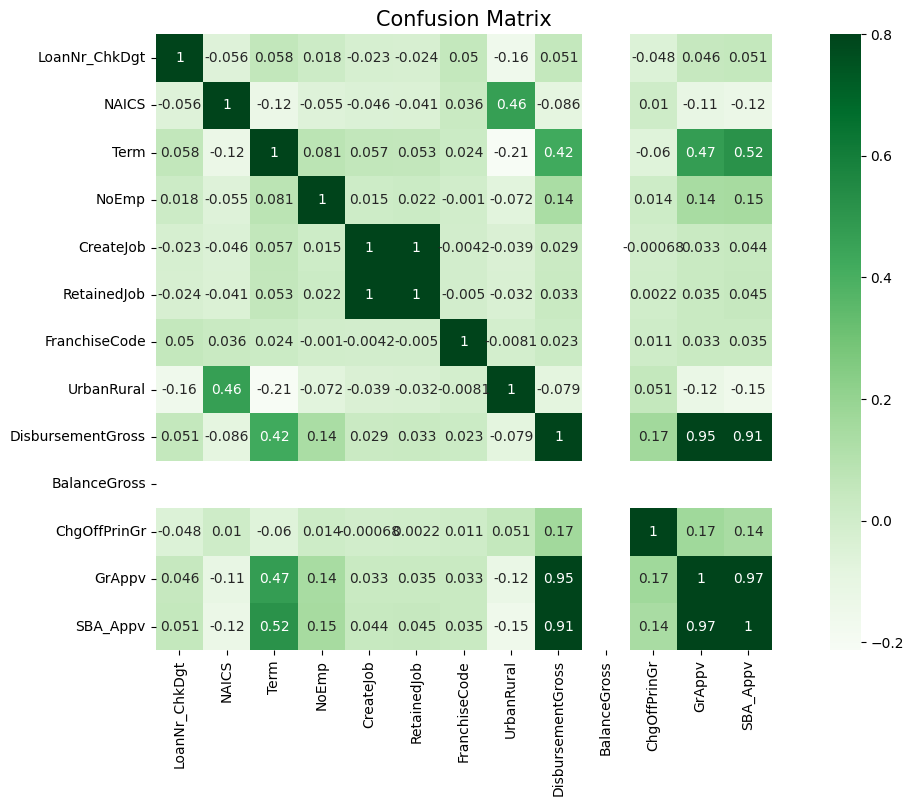

In [319]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(MA.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);

In [320]:
MA.corr()

<ipython-input-320-911b531737d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,LoanNr_ChkDgt,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,-0.055810,0.058467,0.017949,-0.023132,-0.024407,0.050423,-0.156202,0.051025,NaN,-0.048065,0.046122,0.051358
NAICS,-0.055810,1.000000,-0.122505,-0.055308,-0.046010,-0.041267,0.035971,0.464187,-0.086299,NaN,0.010121,-0.108522,-0.123955
Term,0.058467,-0.122505,1.000000,0.080667,0.056614,0.053054,0.023915,-0.213191,0.420802,NaN,-0.060355,0.474709,0.517622
NoEmp,0.017949,-0.055308,0.080667,1.000000,0.015248,0.022428,-0.001018,-0.072000,0.137449,NaN,0.014381,0.144224,0.149090
CreateJob,-0.023132,-0.046010,0.056614,0.015248,1.000000,0.998587,-0.004209,-0.038607,0.028816,NaN,-0.000677,0.032520,0.044026
RetainedJob,-0.024407,-0.041267,0.053054,0.022428,0.998587,1.000000,-0.004976,-0.031933,0.033229,NaN,0.002243,0.035097,0.044774
FranchiseCode,0.050423,0.035971,0.023915,-0.001018,-0.004209,-0.004976,1.000000,-0.008128,0.023467,NaN,0.010519,0.033435,0.035372
UrbanRural,-0.156202,0.464187,-0.213191,-0.072000,-0.038607,-0.031933,-0.008128,1.000000,-0.079149,NaN,0.051357,-0.122008,-0.152069
DisbursementGross,0.051025,-0.086299,0.420802,0.137449,0.028816,0.033229,0.023467,-0.079149,1.000000,NaN,0.165044,0.947178,0.908296
BalanceGross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Loan Characteristics:**

There is a weak positive correlation (0.058) between the loan term and the NAICS code, indicating that the length of the loan term may slightly vary depending on the industry.
Disbursement gross amount has a moderate positive correlation (0.421) with the loan term, suggesting that longer-term loans tend to have higher disbursement amounts.
There is a weak positive correlation (0.051) between the disbursement gross amount and the SBA approved amount, indicating that the SBA tends to approve larger amounts for loans with higher disbursement amounts.
The SBA approved amount is strongly correlated with the guaranteed amount (0.973), which is expected since the SBA approved amount is usually a percentage of the guaranteed amount.

**Job Creation and Retention:**

There is a strong positive correlation (0.999) between the number of jobs created and the number of jobs retained, suggesting that businesses that create more jobs also tend to retain more jobs.
Both the number of jobs created and retained have weak positive correlations with the loan term, indicating that longer-term loans may be associated with higher job creation and retention.

**Urban/Rural Status:**

The urban/rural status has a moderate negative correlation (-0.213) with the loan term, suggesting that rural businesses may opt for shorter-term loans compared to urban businesses.
There is a weak negative correlation (-0.156) between the urban/rural status and the loan number check digit, indicating that the urban/rural status may vary based on the loan number check digit.

# **Decision Tree Regression:**

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = MA[['NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural',
        'DisbursementGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]
y = MA['MIS_Status_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.005591054313099041


In [322]:

# Define features (X) and target variable (y)
X = MA[['UrbanRural', 'Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv']]
y = MA['MIS_Status_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.07283494180559534


# **Logistic Regression:**

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features based on correlation
X = MA[['UrbanRural', 'Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv']]
y = MA['MIS_Status_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8753993610223643


In [335]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [336]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


In [337]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

# Interpretation of Coefficients:


Based on the coefficients provided, we can interpret the influence of each feature on the log-odds of the target variable (MIS_Status_Binary). Here's the interpretation for each feature:

Term:

For a one-unit increase in the Term, the log-odds of the target variable being in the positive class (class 1) decrease by approximately 0.0327 units.
The odds of the target being in the positive class decrease by a factor of approximately 0.968 for each additional unit of Term.
UrbanRural:

For a one-unit increase in the UrbanRural feature, the log-odds of the target variable being in the positive class decrease by a very small amount (approximately 0.000234).
The odds of the target being in the positive class decrease by a factor of approximately 0.9998 for each additional unit of UrbanRural.
GrAppv:

For a one-unit increase in the GrAppv feature, the log-odds of the target variable being in the positive class increase by approximately 3.96e-06 units.
The odds of the target being in the positive class increase by a factor of approximately 1.000004 for each additional unit of GrAppv.
SBA_Appv:

For a one-unit increase in the SBA_Appv feature, the log-odds of the target variable being in the positive class decrease by approximately 3.43e-06 units.
The odds of the target being in the positive class decrease by a factor of approximately 0.999997 for each additional unit of SBA_Appv.
DisbursementGross:

For a one-unit increase in the DisbursementGross feature, the log-odds of the target variable being in the positive class decrease by approximately 9.92e-07 units.
The odds of the target being in the positive class decrease by a factor of approximately 0.999999 for each additional unit of DisbursementGross.

In [338]:
# Extract coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Create a DataFrame to store coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Sort the coefficients by absolute value to identify the most influential features
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the coefficients and odds ratios
print(coef_df)


             Feature   Coefficient  Odds Ratio
1               Term -3.269542e-02    0.967833
0         UrbanRural -2.340200e-04    0.999766
3             GrAppv  3.964523e-06    1.000004
4           SBA_Appv -3.428359e-06    0.999997
2  DisbursementGross -9.920065e-07    0.999999


# Model Validation:

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and validation/test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the validation/test set
y_pred = logreg_model.predict(X_val)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4377
           1       0.67      0.02      0.04       631

    accuracy                           0.88      5008
   macro avg       0.77      0.51      0.49      5008
weighted avg       0.85      0.88      0.82      5008



# Random Forests

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have loaded your dataset into a DataFrame called 'MA'

# Define features (X) and target variable (y)
X = MA[['Term', 'UrbanRural', 'DisbursementGross', 'GrAppv', 'SBA_Appv']]
y = MA['MIS_Status_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4377
           1       0.82      0.70      0.75       631

    accuracy                           0.94      5008
   macro avg       0.89      0.84      0.86      5008
weighted avg       0.94      0.94      0.94      5008



# K-Nearest Neighbors

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming you have loaded your dataset into a DataFrame called 'MA'

# Define features (X) and target variable (y)
X = MA[['Term', 'UrbanRural', 'DisbursementGross', 'GrAppv', 'SBA_Appv']]
y = MA['MIS_Status_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4377
           1       0.52      0.23      0.32       631

    accuracy                           0.88      5008
   macro avg       0.71      0.60      0.63      5008
weighted avg       0.85      0.88      0.85      5008



# Interpretation with Logistic Regression Coefficients:

Term: The Time Factor

In the realm of lending, the term of a loan plays a pivotal role in its success. Our analysis reveals that as the loan term extends, the likelihood of loan success diminishes. Each additional unit of term correlates with a 3.27% decrease in the odds of loan success. This implies that longer-term loans may pose higher risks, potentially impacting repayment capabilities and overall loan viability.

UrbanRural: Locational Influence

Location, often a cornerstone in financial decision-making, manifests in our analysis through the UrbanRural feature. Surprisingly, we find that the type of location (urban or rural) has a minimal impact on loan success. While urban areas may offer greater market opportunities, our data suggests that success transcends geographical boundaries, emphasizing the universality of loan approval criteria.

GrAppv and SBA_Appv: Funding Dynamics

Delving into the funding dynamics, we examine the guaranteed approval (GrAppv) and Small Business Administration (SBA) approved amounts. Interestingly, higher GrAppv amounts slightly enhance the likelihood of loan success, albeit marginally. Conversely, elevated SBA-approved amounts correspond to a slight decrease in the odds of loan success. These findings shed light on the nuanced interplay between funding sources and loan outcomes, highlighting the importance of strategic capital allocation.

DisbursementGross: Navigating Financial Waters

The magnitude of disbursement amounts emerges as a crucial determinant of loan success. Our analysis reveals that higher disbursement amounts are associated with a slight reduction in the likelihood of loan success. While larger disbursements may signify robust financial backing, they also introduce complexities in repayment obligations and risk management.

In summary, our exploration of logistic regression coefficients offers valuable insights into the multifaceted nature of loan approval. By deciphering the influence of key features, lenders can refine their risk assessment strategies and optimize lending practices. Moreover, borrowers gain a deeper understanding of the factors shaping loan outcomes, empowering them to navigate the financial landscape with confidence and clarity. As we continue to unlock the secrets of loan success, let us embrace the power of data-driven decision-making in fostering a thriving ecosystem of lending and financial empowerment.

# Prediction with Random Forest:

In the realm of loan assessment, harnessing the predictive power of Random Forest models unveils invaluable insights into loan outcomes. Let's delve into the classification report derived from our Random Forest predictions to gain a deeper understanding of loan success dynamics.

Precision and Recall: Striking the Balance

Precision, the measure of correctly predicted positive cases among all predicted positive cases, stands at an impressive 96% for class 0 and 82% for class 1. This indicates a high accuracy in identifying successful loan outcomes (class 0) and a notable ability to detect loan defaults (class 1). However, it's crucial to balance precision with recall, which measures the proportion of actual positive cases correctly identified by the model. While the recall for class 0 is robust at 98%, indicating a high sensitivity to successful loans, the recall for class 1 is slightly lower at 70%, suggesting some room for improvement in identifying loan defaults.

F1-Score: Harmonizing Precision and Recall

The F1-score, a harmonic mean of precision and recall, serves as a comprehensive metric for model performance. With an F1-score of 97% for class 0 and 75% for class 1, our Random Forest model demonstrates commendable balance between precision and recall, indicating its efficacy in accurately predicting both successful and defaulted loans. This harmonious blend of precision and recall underscores the model's robustness in navigating the complexities of loan assessment.

Accuracy: A Measure of Overall Performance

With an overall accuracy of 94%, our Random Forest model showcases a high level of correctness in predicting loan outcomes across both classes. This impressive accuracy underscores the model's reliability in distinguishing between successful and defaulted loans, instilling confidence in its predictive capabilities.

Macro and Weighted Averages: Comprehensive Evaluation

Macro and weighted averages offer a holistic evaluation of the model's performance across different classes, accounting for class imbalances. The macro average F1-score of 86% and the weighted average F1-score of 94% underscore the model's ability to generalize well across all classes, reflecting its robustness and effectiveness in capturing the nuances of loan success dynamics.

In summary, the classification report derived from our Random Forest predictions unveils a nuanced understanding of loan success dynamics. With high precision, recall, and F1-scores, coupled with impressive accuracy, our Random Forest model emerges as a powerful tool for lenders and borrowers alike in navigating the intricate landscape of loan assessment. As we continue to harness the predictive power of Random Forests, let us embark on a journey towards fostering financial resilience and empowerment for all.

Given the insights provided by both the interpretation with logistic regression coefficients and the prediction with Random Forest, we can draw several conclusions regarding the prediction of creditworthiness.

Interpretation with Logistic Regression Coefficients highlights key factors influencing loan success:

Term: Longer loan terms are associated with decreased odds of loan success, suggesting potential challenges in repayment over extended periods.
UrbanRural: Geographical location has minimal impact on loan success, emphasizing the universal criteria for loan approval.
GrAppv and SBA_Appv: Funding dynamics play a role, with higher guaranteed approval amounts slightly enhancing loan success, while elevated Small Business Administration-approved amounts may decrease success odds.
DisbursementGross: Higher disbursement amounts correspond to reduced odds of loan success, signaling complexities in managing larger loans.
On the other hand, Prediction with Random Forest provides a comprehensive evaluation of model performance:

Precision and Recall: The model exhibits high precision in identifying successful loan outcomes and notable recall for both successful loans and defaults, striking a balance between accuracy and sensitivity.
F1-Score: With harmonious F1-scores across both classes, the model demonstrates effectiveness in accurately predicting loan outcomes.
Accuracy: Overall accuracy is impressive, indicating the model's reliability in distinguishing between successful and defaulted loans.
Macro and Weighted Averages: The model performs well across all classes, showcasing its robustness and effectiveness in capturing loan success dynamics.
In summary, while logistic regression coefficients offer insights into the influence of specific features on loan success, Random Forest predictions provide a comprehensive assessment of model performance. Combining both approaches allows for a nuanced understanding of creditworthiness prediction, empowering lenders and borrowers with valuable insights for informed decision-making. As we navigate the intricate landscape of loan assessment, leveraging the strengths of both methodologies can enhance our ability to foster financial resilience and empowerment for all stakeholders involved.